In [1]:
import sys
sys.path.append('../utils/')
from utils import *
from TableMapperBERT import TableMapperBERT
from tqdm.notebook import tqdm
tqdm.pandas()

/opt/conda/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
query, schema = get_spider_schema_table_files()
tableMapper = TableMapperBERT(query, schema)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
res = []
count1 = 0
count2 = 0
for i in tqdm(list(set(schema.schema_id.values))):
    s, t = tableMapper.get_filtered_schema(i)
    count_match, count_all = tableMapper.get_exact_match_accuracy(s, t)

    count1 += count_match
    count2 += count_all

    if(count1 == 0):
        print(i)

    res.append([i, count_match/count_all, len(s), len(t)])

  0%|          | 0/174 [00:00<?, ?it/s]

In [4]:
test_schema = 'college_2'
s, t = tableMapper.get_filtered_schema(test_schema)
count_match, count_all = tableMapper.get_exact_match_accuracy(s, t, 0)
print(count_match / count_all)

0.15976331360946747


0.20449077759015888
0.19933522338449505


,schema_id,score,num_tables,num_queries
0,company_1,0.0,6,7
1,soccer_1,0.0,7,14
2,real_estate_properties,0.0,5,4
3,roller_coaster,0.0,2,17
4,baseball_1,0.0,26,82
5,restaurants,0.0,3,125
6,TheHistoryofBaseball,0.0,5,78
7,cre_Drama_Workshop_Groups,0.0,18,82
8,flight_4,0.0,3,82
9,local_govt_mdm,0.0,8,14


<Axes: >

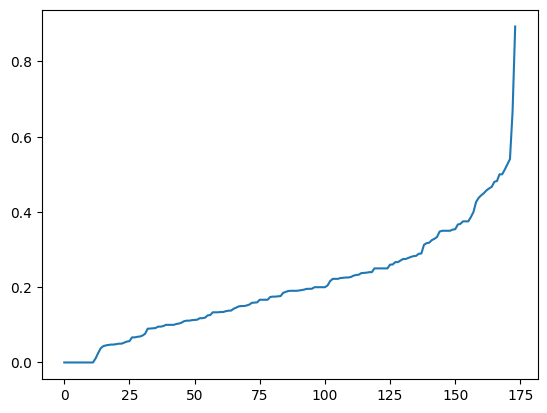

In [5]:
score_df = pd.DataFrame(res, columns=['schema_id', 'score', 'num_tables', 'num_queries']).sort_values(by='score').reset_index(drop=True)
print(score_df.score.mean())
print(count1 / count2)
display(score_df.head(10))
score_df.score.plot()

In [6]:
print(count1)
print(count2)

# 5194
# 9685

# 5223
# 9685

5557
9685
